<a href="https://colab.research.google.com/github/Bhagyashree2k2/ADA-pograms/blob/main/main_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
directory_path='/content/drive/MyDrive/Colab Notebooks/Brain Tumor/'
os.chdir(directory_path)
os.getcwd()

'/content/drive/.shortcut-targets-by-id/17fOszUvwEkfnCJfKbzYQTWWNdvxXTUdx/Brain Tumor'

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Brain Tumor/Brain_MRI/'


In [4]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.9 MB/s eta 0:00:00


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import skimage.io as io
import cv2

In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers,optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler
import random

In [15]:
%matplotlib inline
#to display plots in the same file

In [16]:
brain_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Brain Tumor/Brain_MRI/data_mask.csv')


In [17]:
brain_df

patient_id  \
0     TCGA_CS_5395_19981004   
1     TCGA_CS_5395_19981004   
2     TCGA_CS_5395_19981004   
3     TCGA_CS_5395_19981004   
4     TCGA_CS_5395_19981004   
...                     ...   
3924  TCGA_DU_6401_19831001   
3925  TCGA_DU_6401_19831001   
3926  TCGA_DU_6401_19831001   
3927  TCGA_DU_6401_19831001   
3928  TCGA_DU_6401_19831001   

                                             image_path  \
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   
...                                                 ...   
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...   
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...   
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...   
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...   
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...   

                                              mask_path  mask  
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...     0  
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...     0  
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...     0  
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...     0  
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...     0  
...                                                 ...   ...  
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...     0  
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...     0  
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...     0  
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...     0  
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...     0  

[3929 rows x 4 columns]

In [18]:
brain_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [19]:
brain_df.image_path[0]

'TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif'

In [20]:
brain_df.mask_path[0]

'TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_mask.tif'

In [21]:
brain_df['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

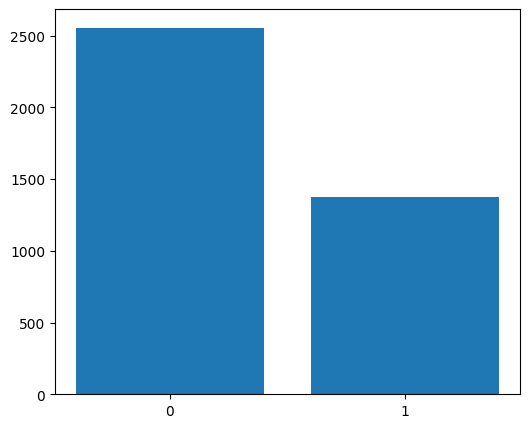

In [22]:
fig=plt.figure(figsize=(6,5))
plt.bar(x=['0','1'],height=brain_df['mask'].value_counts())
plt.show()

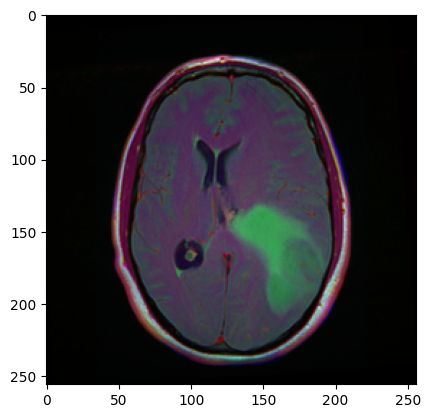

In [23]:
image=cv2.imread(path+brain_df.image_path[1301])
plt.imshow(image)

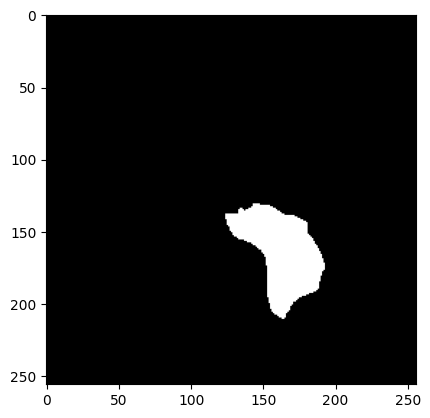

In [24]:
image=cv2.imread(path+brain_df.mask_path[1301])
plt.imshow(image)

In [25]:
cv2.imread(path+brain_df.image_path[1301]).max()

233

In [26]:
cv2.imread(path+brain_df.image_path[1301]).min()

0

In [27]:
cv2.imread(path+brain_df.mask_path[1000]).max()

255

In [28]:
cv2.imread(path+brain_df.mask_path[1000]).min()

0

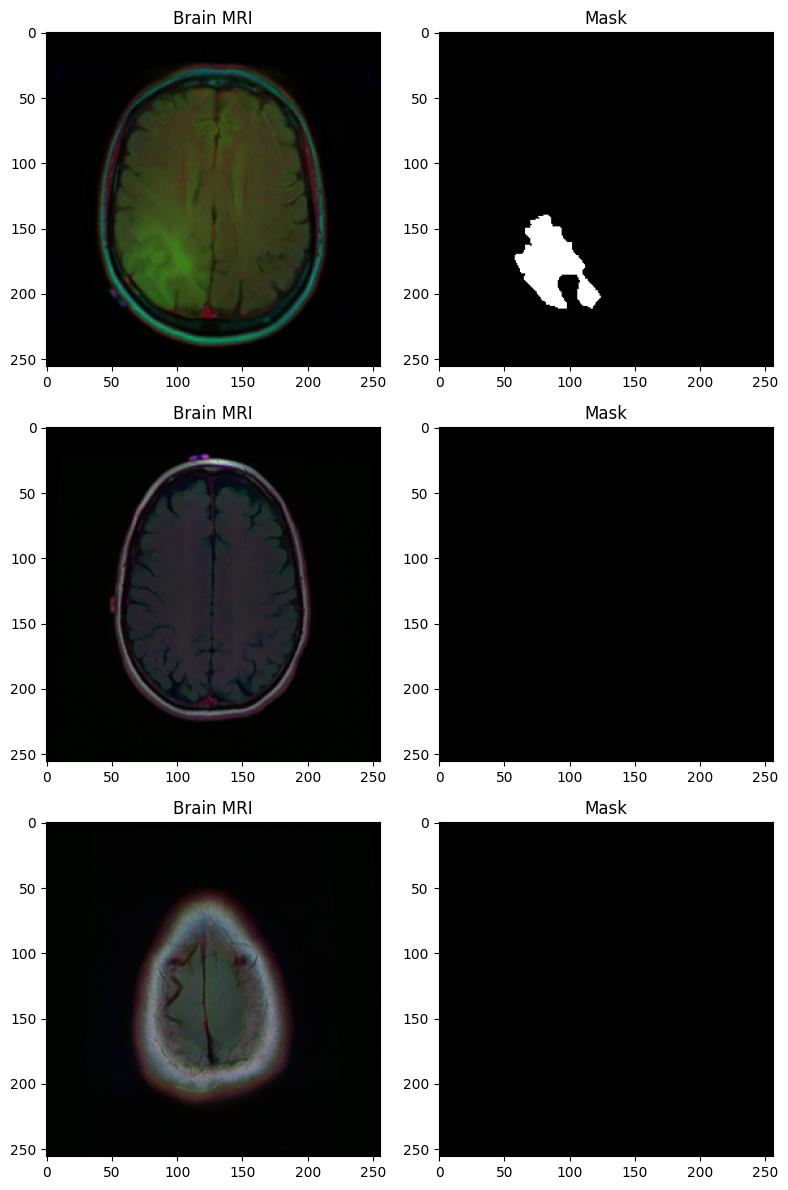

In [29]:
fig,axs=plt.subplots(3,2,figsize=(8,12))
count=0
for x in range(3):
  i=random.randint(0,len(brain_df))
  axs[count][0].title.set_text("Brain MRI")
  axs[count][0].imshow(cv2.imread(path + brain_df.image_path[i]))
  axs[count][1].title.set_text("Mask")
  axs[count][1].imshow(cv2.imread(path + brain_df.mask_path[i]))
  count=count+1
fig.tight_layout()

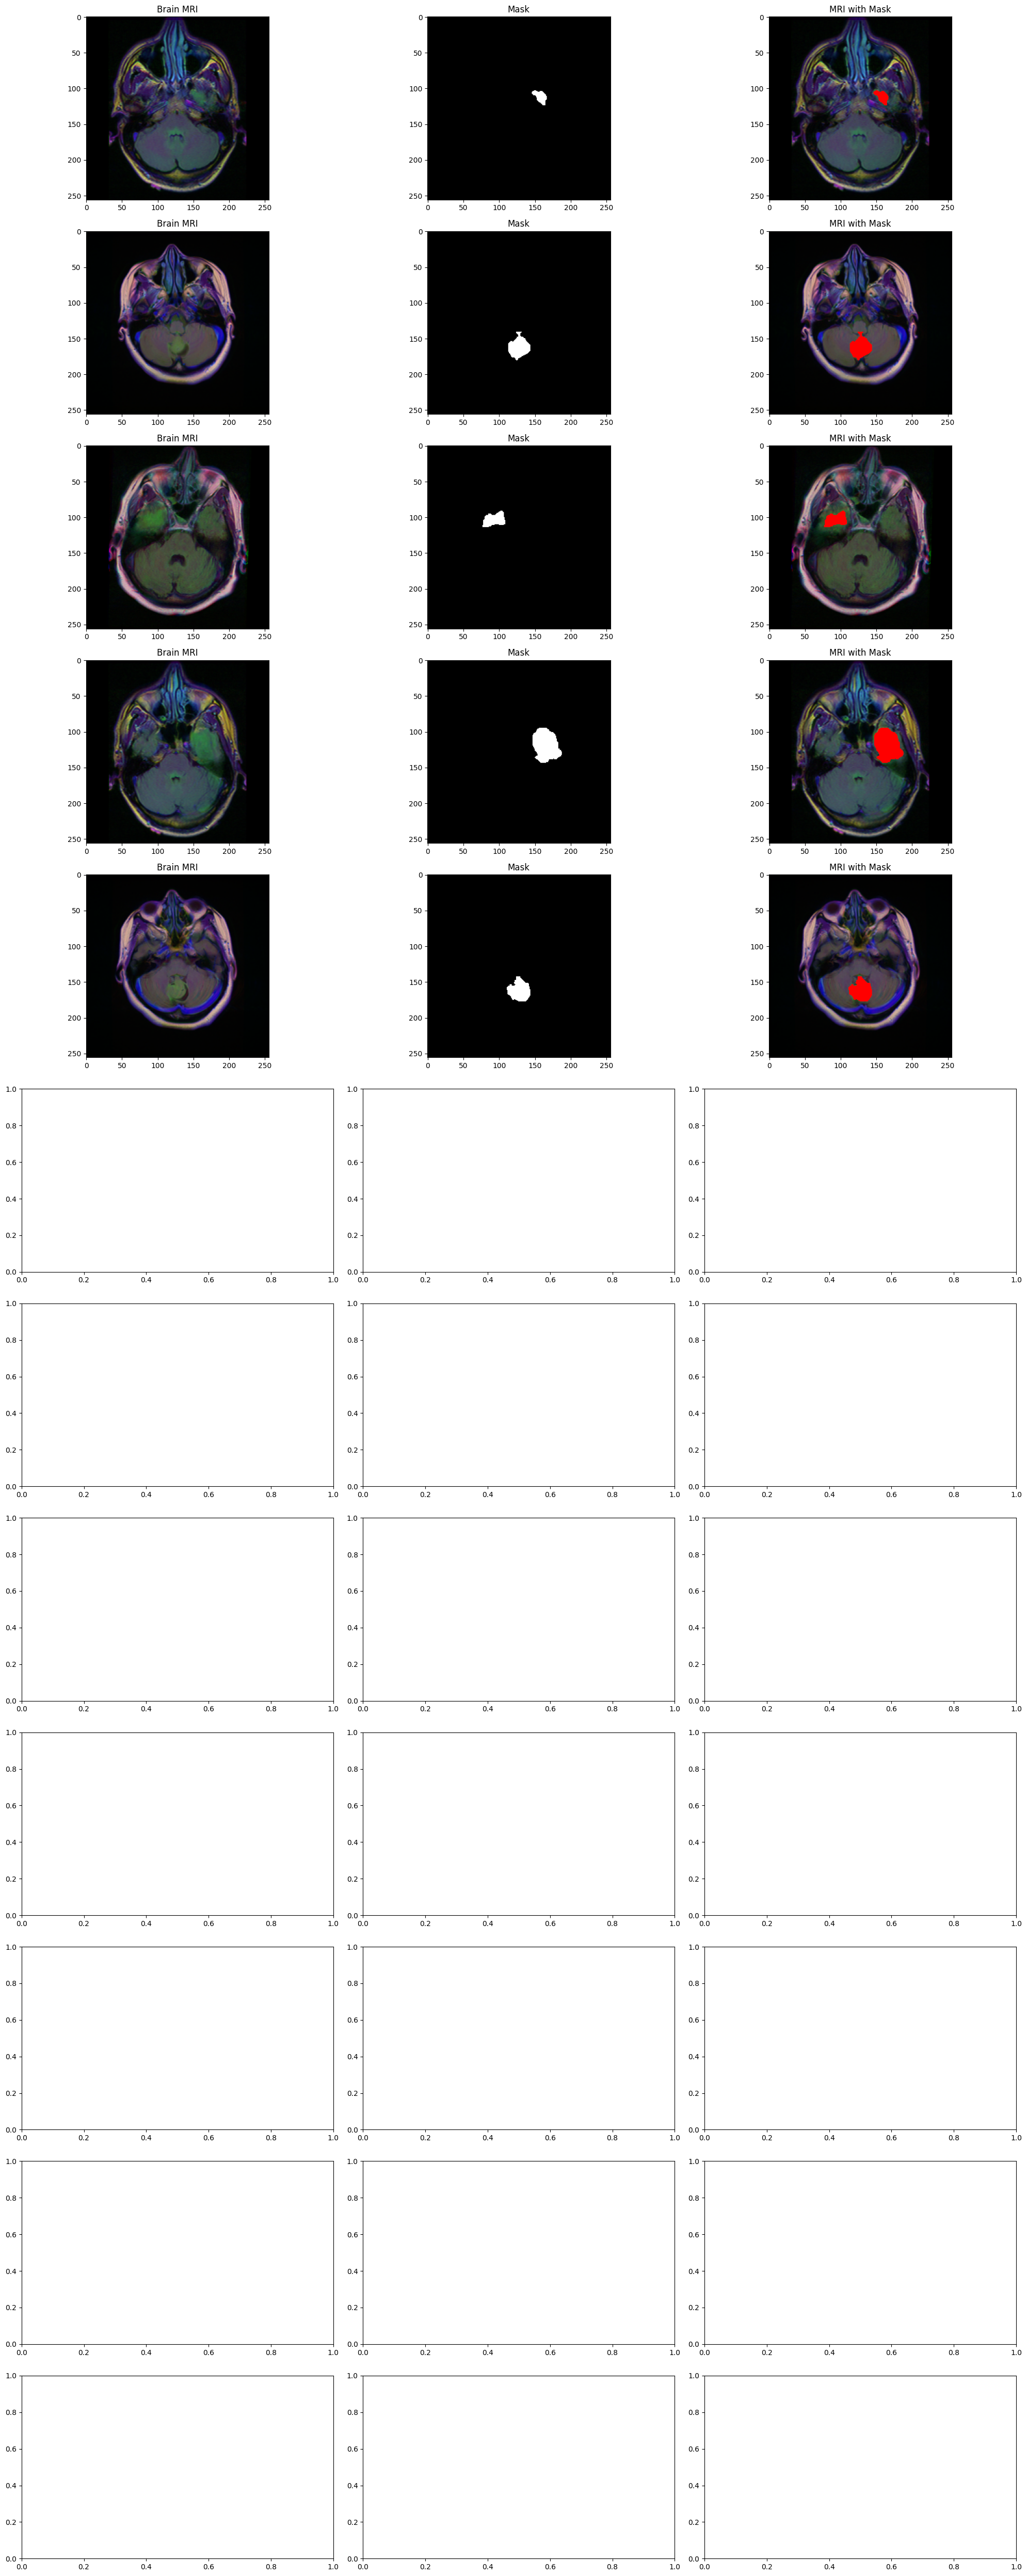

In [30]:
count = 0
fig, axs = plt.subplots(12, 3, figsize = (20, 50))
for i in range(len(brain_df)):
  if brain_df['mask'][i] ==1 and count <5:
    img = io.imread(path+brain_df.image_path[i])
    axs[count][0].title.set_text('Brain MRI')
    axs[count][0].imshow(img)
    
    mask = io.imread(path+brain_df.mask_path[i])
    axs[count][1].title.set_text('Mask')
    axs[count][1].imshow(mask, cmap = 'gray')
    
    img[mask == 255] = (255, 0, 0) #Red color
    axs[count][2].title.set_text('MRI with Mask')
    axs[count][2].imshow(img)
    count+=1

fig.tight_layout()

preprocessing

In [31]:
brain_df.head(5)

patient_id                                         image_path  \
0  TCGA_CS_5395_19981004  TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1  TCGA_CS_5395_19981004  TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2  TCGA_CS_5395_19981004  TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3  TCGA_CS_5395_19981004  TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4  TCGA_CS_5395_19981004  TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   

                                           mask_path  mask  
0  TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...     0  
1  TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...     0  
2  TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...     0  
3  TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...     0  
4  TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...     0

In [32]:
brain_df.shape

(3929, 4)

In [33]:
b_df=brain_df.drop(columns=['patient_id'])
b_df.shape

(3929, 3)

In [34]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 92.2+ KB


In [35]:
#converting mask column into object datatype
b_df['mask']=b_df['mask'].apply(lambda x:str(x))

In [36]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [37]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(b_df,test_size=0.15)

In [38]:
test

image_path  \
3869  TCGA_DU_5872_19950223/TCGA_DU_5872_19950223_69...   
2403  TCGA_DU_6400_19830518/TCGA_DU_6400_19830518_23...   
1265  TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_12...   
1601  TCGA_FG_7637_20000922/TCGA_FG_7637_20000922_15...   
3352  TCGA_HT_7881_19981015/TCGA_HT_7881_19981015_37...   
...                                                 ...   
2495  TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_24...   
1496  TCGA_HT_7473_19970826/TCGA_HT_7473_19970826_14...   
640   TCGA_HT_8111_19980330/TCGA_HT_8111_19980330_6.tif   
1476  TCGA_DU_8165_19970205/TCGA_DU_8165_19970205_14...   
1608  TCGA_HT_7608_19940304/TCGA_HT_7608_19940304_15...   

                                              mask_path mask  
3869  TCGA_DU_5872_19950223/TCGA_DU_5872_19950223_69...    0  
2403  TCGA_DU_6400_19830518/TCGA_DU_6400_19830518_23...    1  
1265  TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_12...    0  
1601  TCGA_FG_7637_20000922/TCGA_FG_7637_20000922_15...    1  
3352  TCGA_HT_7881_19981015/TCGA_HT_7881_19981015_37...    1  
...                                                 ...  ...  
2495  TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_24...    1  
1496  TCGA_HT_7473_19970826/TCGA_HT_7473_19970826_14...    1  
640   TCGA_HT_8111_19980330/TCGA_HT_8111_19980330_6_...    0  
1476  TCGA_DU_8165_19970205/TCGA_DU_8165_19970205_14...    1  
1608  TCGA_HT_7608_19940304/TCGA_HT_7608_19940304_15...    1  

[590 rows x 3 columns]

In [39]:
train

image_path  \
2956  TCGA_FG_A4MU_20030903/TCGA_FG_A4MU_20030903_30...   
485   TCGA_DU_8166_19970322/TCGA_DU_8166_19970322_5.tif   
3461  TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_41...   
2683  TCGA_HT_7608_19940304/TCGA_HT_7608_19940304_26...   
2830  TCGA_HT_7879_19981009/TCGA_HT_7879_19981009_28...   
...                                                 ...   
2702  TCGA_DU_7304_19930325/TCGA_DU_7304_19930325_26...   
1495  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_14...   
1751  TCGA_HT_7475_19970918/TCGA_HT_7475_19970918_16...   
2934  TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_30...   
1467  TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_14...   

                                              mask_path mask  
2956  TCGA_FG_A4MU_20030903/TCGA_FG_A4MU_20030903_30...    0  
485   TCGA_DU_8166_19970322/TCGA_DU_8166_19970322_5_...    0  
3461  TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_41...    0  
2683  TCGA_HT_7608_19940304/TCGA_HT_7608_19940304_26...    0  
2830  TCGA_HT_7879_19981009/TCGA_HT_7879_19981009_28...    0  
...                                                 ...  ...  
2702  TCGA_DU_7304_19930325/TCGA_DU_7304_19930325_26...    1  
1495  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_14...    0  
1751  TCGA_HT_7475_19970918/TCGA_HT_7475_19970918_16...    1  
2934  TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_30...    0  
1467  TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_14...    0  

[3339 rows x 3 columns]

In [40]:
#for data augmentation-cropping,padding
from keras_preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.15)
#validation split will help in measuring accuracy for a particular batch

In [41]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory=path,
    x_col='image_path',
    y_col='mask',
    subset="training",
    batch_size=16,
    shuffle=True,
    class_mode="categorical",
    target_size=(256,256)
)
valid_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory=path,
    x_col='image_path',
    y_col='mask',
    subset="validation",
    batch_size=16,
    shuffle=True,
    class_mode="categorical",
    target_size=(256,256)
)

Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.


In [42]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    directory=path,
    x_col='image_path',
    y_col='mask',
    subset="training",
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
    target_size=(256,256)
)

Found 590 validated image filenames belonging to 2 classes.


In [43]:
 #Transfer learning using a pretrained CNN model (ResNet50)
 basemodel=ResNet50(weights='imagenet',include_top=False,input_tensor=Input(shape=(256,256,3)))

94765736/94765736 [==============================] - 5s 0us/step


In [44]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

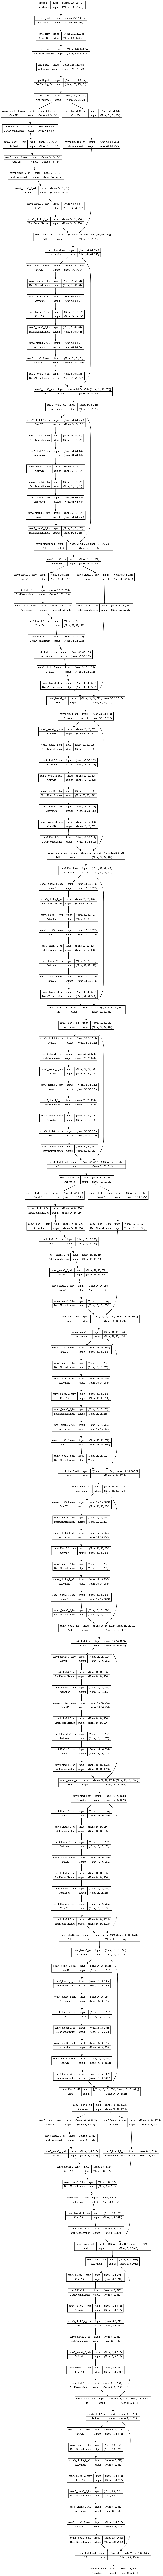

In [45]:
plot_model(basemodel,to_file='/content/drive/MyDrive/Colab Notebooks/Brain Tumor/model_plot.png',show_shapes=True,show_layer_names=True)

In [46]:
#freezing the layer
for layers in basemodel.layers:
  layers.trainable=False

In [47]:
#adding layers to pretrained network
headmodel=basemodel.output
headmodel=AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel=Flatten(name='flatten')(headmodel) #converting output from pooling layer to 1D (flattening)
headmodel=Dense(256,activation='relu')(headmodel)#Dense is a fully connected layer used to identify the classes i.e., classification
headmodel=Dropout(0.3)(headmodel)
headmodel=Dense(256,activation='relu')(headmodel)
#dense(unit,activation-relu(fxn)-rectified linear unit-to learn complex parameters in the data)
headmodel=Dropout(0.3)(headmodel)
headmodel=Dense(256,activation='relu')(headmodel)
headmodel=Dropout(0.3)(headmodel)
headmodel=Dense(2,activation='softmax')(headmodel)#softmax is activation fxn that provides the probability of each classs

model=Model(inputs=basemodel.input,outputs=headmodel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [48]:
#bias  #variance  
#low variance & high bias -- underfitting
#high variance and low bias -- Overfitting
#To prevent overfitting we add dropout layers
#To temperarily remove neurons from training to avoid overfitting (here 30%)



In [49]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [50]:
#compiling the model before training the model to define loss function,optimizers and metrics for prediction
#optimizers are algorithms/fxns to change attributes of neural network like weights and learning rate to reduce loss
#optimizers are used to reduce loss
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
#callback is fxn to be applied at certain stages of training
earlystopping=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

checkpointer=ModelCheckpoint(filepath='classifier-resnet-weights.hdf5',verbose=1,save_best_only=True)

In [52]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [53]:
history=model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 64, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

Epoch 1/64
177/177 [==============================] - ETA: 0s - loss: 0.7106 - accuracy: 0.6185
Epoch 1: val_loss improved from inf to 0.62577, saving model to classifier-resnet-weights.hdf5
177/177 [==============================] - 1852s 10s/step - loss: 0.7106 - accuracy: 0.6185 - val_loss: 0.6258 - val_accuracy: 0.6694
Epoch 2/64
177/177 [==============================] - ETA: 0s - loss: 0.6479 - accuracy: 0.6454
Epoch 2: val_loss did not improve from 0.62577
177/177 [==============================] - 16s 89ms/step - loss: 0.6479 - accuracy: 0.6454 - val_loss: 0.6351 - val_accuracy: 0.6694
Epoch 3/64
177/177 [==============================] - ETA: 0s - loss: 0.6535 - accuracy: 0.6440
Epoch 3: val_loss did not improve from 0.62577
177/177 [==============================] - 16s 89ms/step - loss: 0.6535 - accuracy: 0.6440 - val_loss: 0.6399 - val_accuracy: 0.6633
Epoch 4/64
177/177 [==============================] - ETA: 0s - loss: 0.6519 - accuracy: 0.6443
Epoch 4: val_loss did not i

In [54]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    print("Lowest Validation Loss: epoch {}".format(np.argmin(val_loss)+1))
    print("Highest Validation Accuracy: epoch {}".format(np.argmax(val_acc)+1))

Lowest Validation Loss: epoch 1
Highest Validation Accuracy: epoch 1


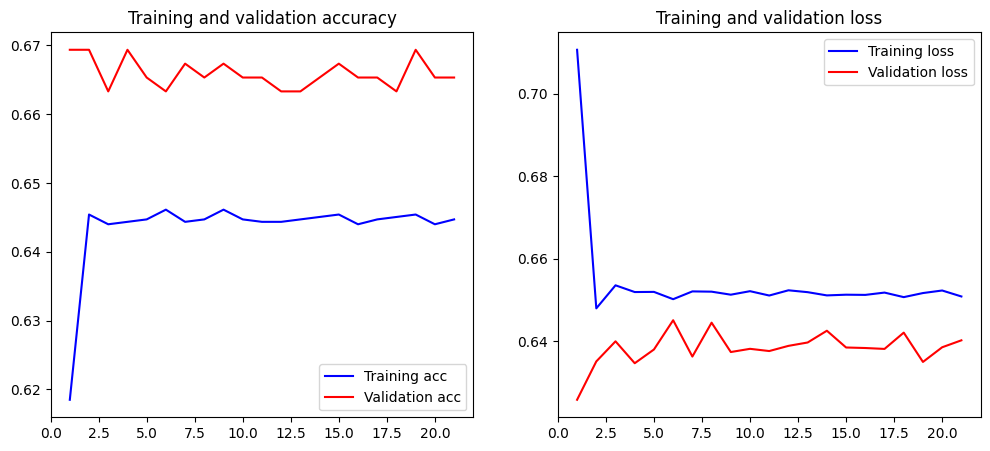

In [73]:
plot_history(history)

In [55]:
model_json=model.to_json()
with open("resnet.json","w") as json_file:
  json_file.write(model_json)

In [56]:
import pickle
with open('model.pkl','wb') as files:
  pickle.dump(model,files)

In [57]:
with open('resnet.json','r') as json_file:
  savedmodel=json_file.read()
model=tf.keras.models.model_from_json(savedmodel)


In [58]:
pickle.dump(model,open('model_weights.pkl','wb'))

In [59]:
model.load_weights('classifier-resnet-weights.hdf5')
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
test_predict=model.predict(test_generator,steps=test_generator.n//16,verbose=1)

19/36 [==============>...............] - ETA: 4:57

36/36 [==============================] - 318s 9s/step


In [61]:
test_predict.shape

(590, 2)

In [62]:
test_predict

array([[0.5952465 , 0.40475348],
       [0.576288  , 0.423712  ],
       [0.61766833, 0.38233164],
       ...,
       [0.6018886 , 0.3981114 ],
       [0.5922167 , 0.4077833 ],
       [0.586136  , 0.413864  ]], dtype=float32)

In [63]:
y_classes=[]
for i in test_predict:
  y_classes.append(str(np.argmax(i)))

y_classes=np.asarray(y_classes)

In [64]:
original=np.array(test['mask'])[:len(test_predict)]

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy=accuracy_score(original,y_classes)

In [67]:
accuracy

0.6644067796610169

In [68]:
from sklearn.metrics import classification_report
report = classification_report(original, y_classes, labels = [0,1])
print(report)

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       392
           1       0.00      0.00      0.00       198

   micro avg       0.66      0.66      0.66       590
   macro avg       0.33      0.50      0.40       590
weighted avg       0.44      0.66      0.53       590



/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packag

<Axes: >

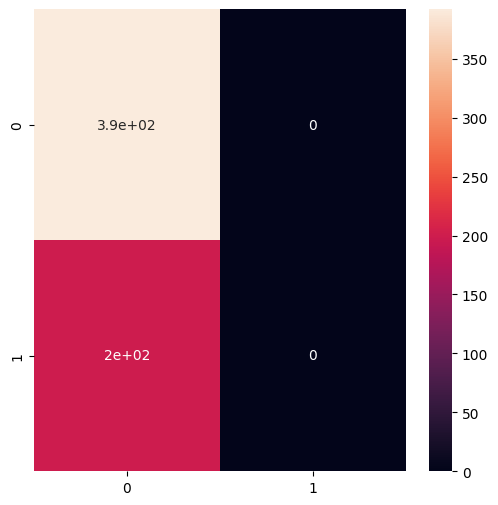

In [69]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(original,y_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True)

In [70]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [71]:
import gradio as gr

In [72]:
def classify(img):
  img=img.reshape(-1,256,256,3)
  pred=model.predict(img)
  ans=np.argmax(pred)
  if ans==0:
    return "Tumor negative"
  else:
    return "Tumor positive"

iface=gr.Interface(classify,gr.inputs.Image(),"text")
iface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>